# Тема “Обучение без учителя”

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.

In [10]:
from sklearn.datasets import load_boston

Создайте датафреймы X и y из этих данных.


In [11]:
boston = load_boston()

In [12]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler.


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape


(404, 13)

In [17]:
X_train_tsne.shape


(404, 2)

Постройте диаграмму рассеяния на этих данных.


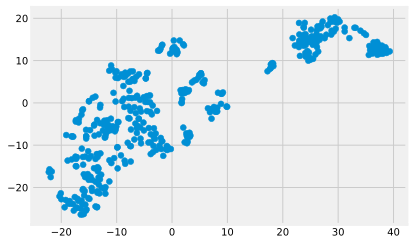

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


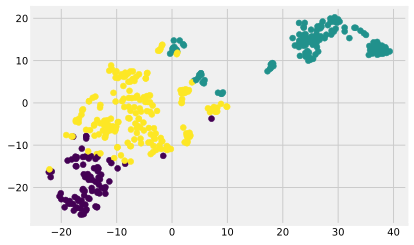

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.


In [21]:
# Средняя стоимость во всей выборке
y_train["price"].mean()

22.796534653465343

In [22]:
# Средняя стоимость 1 кластера
y_train.loc[labels_train == 0, "price"].mean()

27.78837209302326

In [23]:
# Средняя стоимость 2 кластера
y_train.loc[labels_train == 1, "price"].mean()


16.165354330708663

In [24]:
# Средняя стоимость 3 кластера
y_train.loc[labels_train == 2, "price"].mean()


24.958115183246072

In [25]:
# Средний уровень преступности во всей выборке
X_train["CRIM"].mean()

3.6091246287128715

In [27]:
# Средний уровень преступности по 1 кластеру
X_train.loc[labels_train == 0, "CRIM"].mean()

0.07356558139534884

In [28]:
# Средний уровень преступности по 2 кластеру
X_train.loc[labels_train == 1, "CRIM"].mean()

10.797028425196851

In [29]:
# Средний уровень преступности по 3 кластеру
X_train.loc[labels_train == 2, "CRIM"].mean()

0.4216602094240837

## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [30]:
labels_test = kmeans.predict(X_test_scaled)

In [31]:
# Средняя стоимость во всей выборке
y_test["price"].mean()

21.488235294117644

In [32]:
# Средняя стоимость 1 кластера
y_test.loc[labels_test == 0, "price"].mean()

31.35

In [33]:
# Средняя стоимость 2 кластера
y_test.loc[labels_test == 1, "price"].mean()

16.43714285714286

In [34]:
# Средняя стоимость 3 кластера
y_test.loc[labels_test == 2, "price"].mean()

21.860784313725492

In [35]:
# Средний уровень преступности во всей выборке
X_test["CRIM"].mean()

3.630946764705882

In [36]:
# Средний уровень преступности по 1 кластеру
X_test.loc[labels_test == 0, "CRIM"].mean()

0.06206

In [37]:
# Средний уровень преступности по 2 кластеру
X_test.loc[labels_test == 1, "CRIM"].mean()

10.165531142857143

In [38]:
# Средний уровень преступности по 3 кластеру
X_test.loc[labels_test == 2, "CRIM"].mean()


0.2660788235294118